# Scenario 

The data-set contains aggregate individual statistics for 67 NBA seasons. from basic box-score attributes such as points, assists, rebounds etc., to more advanced money-ball like features such as Value Over Replacement. 

In this task not all data will be used, **only data in 2017.** So it is necessary to do filtering at the beginning. Besides that there are some players who make team transfers in the NBA transfer market so that there is duplication of player data. Therefore you can use the df.drop_duplicates() syntax to solve this to produce the same output as the trainer. Delete columns that have as many missing values as the entire row of data. Then you can do additional preprocessing if needed or you can immediately process the data. 

# Objective

Some goals of this project :

1. Who is the youngest and oldest player in the NBA in 2017 for each team (Tm) ?
2. Which player has the most minutes played (MP) in each position (Pos) ?
3. Which team has the highest average total rebound percentage (TRB%), assist percentage (AST%), steal percentage (STL%), and block percentage (BLK%) ?
4. Who is the best player in your opinion based on his record stats ? note : you can refer to variables point (PTS), assists, rebounds, or anything else. A combination of several variables would be nice
5. Which team has the best average stat record of their players ? Note : you can refer to points, assists, rebounds, or anything else. A combination of several variables would be nice

# Import library and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Seasons_Stats.csv')
df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


# Data Preprocessing

## Drop Unnamed: 0 column

In [2]:
df = df.drop("Unnamed: 0",axis=1)
df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


## Select 2017 player data only

In [3]:
df2017 = df[df['Year']==2017.0]
df2017

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24098,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
24099,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [4]:
#Reset Index
df2017 = df2017.reset_index(drop=True)
df2017

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
3,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
4,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
591,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
592,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
593,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


## Check duplicate player data by Player column

In [5]:
duplicateData = df2017[df2017.duplicated('Player')]
duplicateData

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
3,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
15,2017.0,Justin Anderson,SF,23.0,DAL,51.0,2.0,710.0,14.7,0.521,...,0.795,39.0,110.0,149.0,32.0,28.0,16.0,40.0,64.0,329.0
16,2017.0,Justin Anderson,SF,23.0,PHI,24.0,8.0,518.0,12.8,0.564,...,0.780,30.0,66.0,96.0,34.0,13.0,7.0,26.0,45.0,203.0
33,2017.0,Matt Barnes,SF,36.0,SAC,54.0,13.0,1367.0,10.2,0.501,...,0.758,55.0,241.0,296.0,149.0,36.0,17.0,83.0,138.0,413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2017.0,Derrick Williams,PF,25.0,CLE,25.0,0.0,427.0,11.1,0.628,...,0.692,3.0,54.0,57.0,14.0,5.0,2.0,14.0,27.0,156.0
572,2017.0,Lou Williams,SG,30.0,LAL,58.0,1.0,1403.0,23.9,0.609,...,0.884,14.0,118.0,132.0,183.0,65.0,10.0,120.0,67.0,1078.0
573,2017.0,Lou Williams,SG,30.0,HOU,23.0,0.0,591.0,15.4,0.547,...,0.867,12.0,58.0,70.0,56.0,15.0,9.0,40.0,25.0,343.0
577,2017.0,Troy Williams,SF,22.0,MEM,24.0,13.0,418.0,7.6,0.474,...,0.600,6.0,39.0,45.0,19.0,24.0,9.0,27.0,42.0,127.0


## Delete duplicate data

In [6]:
#drop duplicate data by player name
df2017.drop_duplicates(subset ="Player",inplace = True)

#reset index
df2017 = df2017.reset_index(drop=True)

#show data
df2017

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
3,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,0.559,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
4,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,12.9,0.529,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
482,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
483,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
484,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [7]:
df2017.isnull().sum()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%         1
3PAr        1
FTr         1
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        1
USG%        0
blanl     486
OWS         0
DWS         0
WS          0
WS/48       0
blank2    486
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         1
3P          0
3PA         0
3P%        36
2P          0
2PA         0
2P%         2
eFG%        1
FT          0
FTA         0
FT%        15
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [8]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    486 non-null    float64
 1   Player  486 non-null    object 
 2   Pos     486 non-null    object 
 3   Age     486 non-null    float64
 4   Tm      486 non-null    object 
 5   G       486 non-null    float64
 6   GS      486 non-null    float64
 7   MP      486 non-null    float64
 8   PER     486 non-null    float64
 9   TS%     485 non-null    float64
 10  3PAr    485 non-null    float64
 11  FTr     485 non-null    float64
 12  ORB%    486 non-null    float64
 13  DRB%    486 non-null    float64
 14  TRB%    486 non-null    float64
 15  AST%    486 non-null    float64
 16  STL%    486 non-null    float64
 17  BLK%    486 non-null    float64
 18  TOV%    485 non-null    float64
 19  USG%    486 non-null    float64
 20  blanl   0 non-null      float64
 21  OWS     486 non-null    float64
 22  DW

## Call to Action for Null/Missing Value

1. Remove column **blanl** and **blank2**
2. Replace all missing value by **0.0** value

## Drop blanl and blank2 column

In [9]:
df2017 = df2017.drop(['blanl', 'blank2'], axis = 1)

## Replace all null/missing value with 0.0

In [10]:
df2017.fillna(0.0, inplace = True)
df2017

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
3,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,0.559,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
4,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,12.9,0.529,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
482,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
483,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
484,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [11]:
df2017.isnull().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

Until this step, data preprocessing step are done. df2017 data is already clean (no missing value) and fulfilled the criteria dataset that expected in the question case. After this, df2017 data is able to be explored by find the answer expected objective

# Objective 1



**Who is the youngest and oldest player in the NBA in 2017 for each team (Tm) ?**

## Youngest Player

**Slicing Data to get necessary column**

In [12]:
dfSlicingData = df2017.iloc[:, 1:5]
dfSlicingData

,Player,Pos,Age,Tm
0,Alex Abrines,SG,23.0,OKC
1,Quincy Acy,PF,26.0,TOT
2,Steven Adams,C,23.0,OKC
3,Arron Afflalo,SG,31.0,SAC
4,Alexis Ajinca,C,28.0,NOP
...,...,...,...,...
481,Cody Zeller,PF,24.0,CHO
482,Tyler Zeller,C,27.0,BOS
483,Stephen Zimmerman,C,20.0,ORL
484,Paul Zipser,SF,22.0,CHI


**Get list of youngest age in each team**

In [13]:
#Get list of youngest age in each team
dfYoungestAge = dfSlicingData.groupby(['Tm'], as_index=False).agg({"Age":"min"})

#Select only column Age
dfYoungestAge = dfYoungestAge.iloc[:, 1]

#Convert to list
dfYoungestAge = dfYoungestAge.tolist()

#Show the list
dfYoungestAge

[22.0,
 20.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 19.0,
 20.0,
 20.0,
 20.0,
 20.0,
 19.0,
 19.0,
 20.0,
 20.0,
 19.0,
 20.0,
 20.0,
 21.0,
 20.0,
 20.0,
 21.0,
 19.0,
 21.0,
 19.0,
 20.0,
 21.0,
 21.0,
 21.0,
 21.0]

**Get each player who has the youngest age and sort it by Age**

In [14]:
dfYoungestPlayerOfTeam = dfSlicingData[dfSlicingData['Age'].isin(dfYoungestAge)]
dfYoungestPlayerOfTeam = dfYoungestPlayerOfTeam.sort_values(by='Age')

In [15]:
dfYoungestPlayerOfTeam

,Player,Pos,Age,Tm
485,Ivica Zubac,C,19.0,LAL
235,Derrick Jones,SF,19.0,PHO
317,Jamal Murray,SG,19.0,DEN
78,Marquese Chriss,PF,19.0,PHO
344,Georgios Papagiannis,C,19.0,SAC
...,...,...,...,...
332,Jusuf Nurkic,C,22.0,TOT
352,Cameron Payne,PG,22.0,TOT
353,Elfrid Payton,PG,22.0,ORL
188,Willy Hernangomez,C,22.0,NYK


**Delete duplicate column by Team (Tm). So each team only show one youngest player data**

In [16]:
dfYoungestPlayerOfTeam.drop_duplicates(subset='Tm', inplace = True)

**Set Team (Tm) column as index to make easier to understand**

In [17]:
dfYoungestPlayerOfTeam = dfYoungestPlayerOfTeam.set_index('Tm')

#Sort Index
dfYoungestPlayerOfTeam.sort_index()

,Player,Pos,Age
Tm,,,
ATL,Taurean Waller-Prince,SF,22.0
BOS,Jaylen Brown,SF,20.0
BRK,Isaiah Whitehead,PG,21.0
CHI,Bobby Portis,PF,21.0
CHO,Christian Wood,PF,21.0
CLE,Kay Felder,PG,21.0
DAL,Ben Bentil,PF,21.0
DEN,Jamal Murray,SG,19.0
DET,Stanley Johnson,SF,20.0


## Oldest Player

In [18]:
dfSlicingData

,Player,Pos,Age,Tm
0,Alex Abrines,SG,23.0,OKC
1,Quincy Acy,PF,26.0,TOT
2,Steven Adams,C,23.0,OKC
3,Arron Afflalo,SG,31.0,SAC
4,Alexis Ajinca,C,28.0,NOP
...,...,...,...,...
481,Cody Zeller,PF,24.0,CHO
482,Tyler Zeller,C,27.0,BOS
483,Stephen Zimmerman,C,20.0,ORL
484,Paul Zipser,SF,22.0,CHI


**Get list of oldest age in each team**

In [19]:
#Get list of oldest age in each team
dfOldestAge = dfSlicingData.groupby(['Tm'], as_index=False).agg({"Age":"max"})

#Select only column Age
dfOldestAge = dfOldestAge.iloc[:, 1]

#Convert to list
dfOldestAge = dfOldestAge.tolist()

#Show the list
dfOldestAge

[32.0,
 31.0,
 36.0,
 35.0,
 31.0,
 38.0,
 38.0,
 36.0,
 34.0,
 36.0,
 34.0,
 32.0,
 39.0,
 37.0,
 40.0,
 36.0,
 39.0,
 34.0,
 33.0,
 32.0,
 36.0,
 32.0,
 32.0,
 34.0,
 28.0,
 31.0,
 39.0,
 30.0,
 36.0,
 35.0,
 32.0]

**Get each player who has the oldest age and sort it by Age**

In [20]:
dfOldestPlayerOfTeam = dfSlicingData[dfSlicingData['Age'].isin(dfOldestAge)]
dfOldestPlayerOfTeam = dfOldestPlayerOfTeam.sort_values(by='Age',ascending=False)
dfOldestPlayerOfTeam

,Player,Pos,Age,Tm
72,Vince Carter,SF,40.0,MEM
355,Paul Pierce,SF,39.0,LAC
153,Manu Ginobili,SG,39.0,SAS
422,Jason Terry,SG,39.0,MIL
10,Chris Andersen,C,38.0,CLE
...,...,...,...,...
83,Norris Cole,PG,28.0,OKC
390,Larry Sanders,C,28.0,CLE
74,Omri Casspi,SF,28.0,TOT
395,Mike Scott,PF,28.0,ATL


**Delete duplicate column by Team (Tm). So each team only show one oldest player data**

In [21]:
dfOldestPlayerOfTeam.drop_duplicates(subset='Tm', inplace = True)

**Set Team (Tm) column as index to make easier to understand**

In [22]:
dfOldestPlayerOfTeam = dfOldestPlayerOfTeam.set_index('Tm')

#Sort Index
dfOldestPlayerOfTeam.sort_index()

,Player,Pos,Age
Tm,,,
ATL,Gary Neal,SG,32.0
BOS,Gerald Green,SF,31.0
BRK,Luis Scola,PF,36.0
CHI,Dwyane Wade,SG,35.0
CHO,Brian Roberts,PG,31.0
CLE,Chris Andersen,C,38.0
DAL,Dirk Nowitzki,PF,38.0
DEN,Mike Miller,SF,36.0
DET,Beno Udrih,PG,34.0


# Objective 2

**Which player has the most minutes played (MP) in each position (Pos)?** 

## Player with Most Minutes Played in Each Position

**Slicing necessary column**

In [23]:
dfSlicingMP = df2017[['Player','Age','Tm','Pos','MP']]
dfSlicingMP

,Player,Age,Tm,Pos,MP
0,Alex Abrines,23.0,OKC,SG,1055.0
1,Quincy Acy,26.0,TOT,PF,558.0
2,Steven Adams,23.0,OKC,C,2389.0
3,Arron Afflalo,31.0,SAC,SG,1580.0
4,Alexis Ajinca,28.0,NOP,C,584.0
...,...,...,...,...,...
481,Cody Zeller,24.0,CHO,PF,1725.0
482,Tyler Zeller,27.0,BOS,C,525.0
483,Stephen Zimmerman,20.0,ORL,C,108.0
484,Paul Zipser,22.0,CHI,SF,843.0


In [24]:
#Get list of Max Minutes Played in each position
dfMostMP = dfSlicingMP.groupby(['Pos'], as_index=False).agg({"MP":"max"})

In [25]:
dfMostMP

,Pos,MP
0,C,3030.0
1,PF,2803.0
2,PF-C,980.0
3,PG,2947.0
4,SF,3048.0
5,SG,2796.0


In [26]:
#Select only column MP
dfMostMP = dfMostMP.iloc[:, 1]

#Convert to list
dfMostMP = dfMostMP.tolist()

#Show the list
dfMostMP

[3030.0, 2803.0, 980.0, 2947.0, 3048.0, 2796.0]

**Get player with most MP in Each Position**

In [27]:
dfMostMPofEachPosition = dfSlicingMP[dfSlicingMP['MP'].isin(dfMostMP)]
dfMostMPofEachPosition = dfMostMPofEachPosition.sort_values(by='MP',ascending=False)
dfMostMPofEachPosition

,Player,Age,Tm,Pos,MP
461,Andrew Wiggins,21.0,MIN,SF,3048.0
432,Karl-Anthony Towns,21.0,MIN,C,3030.0
171,James Harden,27.0,HOU,PG,2947.0
27,Harrison Barnes,24.0,DAL,PF,2803.0
287,C.J. McCollum,25.0,POR,SG,2796.0
253,Joffrey Lauvergne,25.0,TOT,PF-C,980.0


**Set Position as Index to make it easier to understand**

In [28]:
dfMostMPofEachPosition = dfMostMPofEachPosition.set_index('Pos')

#Sort Index
dfMostMPofEachPosition.sort_index()

,Player,Age,Tm,MP
Pos,,,,
C,Karl-Anthony Towns,21.0,MIN,3030.0
PF,Harrison Barnes,24.0,DAL,2803.0
PF-C,Joffrey Lauvergne,25.0,TOT,980.0
PG,James Harden,27.0,HOU,2947.0
SF,Andrew Wiggins,21.0,MIN,3048.0
SG,C.J. McCollum,25.0,POR,2796.0


# Objective 3

Which team has the *highest average* **total rebound percentage (TRB%), assist percentage (AST%), steal percentage (STL%), and block percentage (BLK%)?** 

In [29]:
df2017

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
3,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,0.559,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
4,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,12.9,0.529,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
482,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
483,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
484,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


**Calculate the average of requested parameter of each Team**

In [30]:
dfAverage = df2017.groupby(['Tm'], as_index=False)['TRB%','AST%','STL%','BLK%'].mean()
dfAverage

<ipython-input-30-03d8663f79f2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfAverage = df2017.groupby(['Tm'], as_index=False)['TRB%','AST%','STL%','BLK%'].mean()


,Tm,TRB%,AST%,STL%,BLK%
0,ATL,9.680000,14.120000,1.500000,1.693333
1,BOS,10.360000,14.573333,1.366667,1.493333
2,BRK,9.757143,15.000000,1.457143,1.400000
3,CHI,9.738462,13.061538,1.584615,1.315385
4,CHO,9.264286,14.042857,1.235714,1.371429
5,CLE,10.142857,11.978571,1.492857,1.885714
6,DAL,10.400000,14.162500,1.287500,1.643750
7,DEN,10.600000,15.860000,1.880000,0.953333
8,DET,10.326667,13.200000,1.260000,1.173333
9,GSW,11.426667,13.960000,1.733333,2.740000


## Team with Highest Average of Total Rebound Percentage (TRB%)

In [31]:
#Get team with Highest Average TRB%
dfHighestAverageTRB = dfAverage[dfAverage['TRB%'] == dfAverage['TRB%'].max()]

#Select Necessary Column
dfHighestAverageTRB = dfHighestAverageTRB[['Tm','TRB%']]

#Show Data
dfHighestAverageTRB

,Tm,TRB%
30,WAS,13.45


## Team with Highest Average Assist Percentage (AST%)

In [32]:
#Get team with Highest Average AST%
dfHighestAverageAST = dfAverage[dfAverage['AST%'] == dfAverage['AST%'].max()]

#Select Necessary Column
dfHighestAverageAST = dfHighestAverageAST[['Tm','AST%']]

#Show Data
dfHighestAverageAST

,Tm,AST%
7,DEN,15.86


## Team with Highest Average Steal Percentage (STL%)

In [33]:
#Get team with Highest Average STL%
dfHighestAverageSTL = dfAverage[dfAverage['STL%'] == dfAverage['STL%'].max()]

#Select Necessary Column
dfHighestAverageSTL = dfHighestAverageSTL[['Tm','STL%']]

#Show Data
dfHighestAverageSTL

,Tm,STL%
17,MIN,2.371429


## Team with Highest Average Block Percentage (BLK%)

In [34]:
#Get team with Highest Average BLK%
dfHighestAverageBLK = dfAverage[dfAverage['BLK%'] == dfAverage['BLK%'].max()]

#Select Necessary Column
dfHighestAverageBLK = dfHighestAverageBLK[['Tm','BLK%']]

#Show Data
dfHighestAverageBLK

,Tm,BLK%
9,GSW,2.74


# Objective 4

Who is the **best player** in your opinion based on his record stats? note: you can refer to variables point (PTS), assists, rebounds, or anything else. A combination of several variables would be nice. 

Answer Method : 

1. Find the best player with the highest mean overall rating of the player
2. Find the best player with the highest/maximal coordinates position in scatter plot

In [35]:
df2017

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
3,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,0.559,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
4,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,12.9,0.529,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
482,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
483,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
484,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


## Find best player based on numerical parameter/column except Year and Age

I will drop **Year and Age** column because it is not statistics parameter

### Create dfMeanOverallPlayer and drop Year&Age column

In [36]:
# Copy dataframe df2017 to dfMeanOverallPlayer
dfOverallPlayer = df2017.copy()

## Drop Year and Age column
dfOverallPlayer = dfOverallPlayer.drop(['Year','Age'], axis=1)

In [37]:
dfOverallPlayer

,Player,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Abrines,SG,OKC,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,Quincy Acy,PF,TOT,38.0,1.0,558.0,11.8,0.565,0.529,0.353,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,Steven Adams,C,OKC,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
3,Arron Afflalo,SG,SAC,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
4,Alexis Ajinca,C,NOP,39.0,15.0,584.0,12.9,0.529,0.022,0.225,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Cody Zeller,PF,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
482,Tyler Zeller,C,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
483,Stephen Zimmerman,C,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
484,Paul Zipser,SF,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


### Calculate the mean overall parameter each player and assign to Mean column

In [38]:
dfOverallPlayer['MeanOverallRating'] = dfOverallPlayer.mean(axis=1)

#show data
dfOverallPlayer

,Player,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MeanOverallRating
0,Alex Abrines,SG,OKC,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,...,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0,67.574489
1,Quincy Acy,PF,TOT,38.0,1.0,558.0,11.8,0.565,0.529,0.353,...,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0,41.069689
2,Steven Adams,C,OKC,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,...,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0,174.865289
3,Arron Afflalo,SG,SAC,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,...,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0,92.048822
4,Alexis Ajinca,C,NOP,39.0,15.0,584.0,12.9,0.529,0.022,0.225,...,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0,45.784267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Cody Zeller,PF,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,124.546622
482,Tyler Zeller,C,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,39.695644
483,Stephen Zimmerman,C,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,9.374911
484,Paul Zipser,SF,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,51.868711


### Find the Player with the Highest MeanOverallRating

In [39]:
dfPlayerHighestMeanOverallRating = dfOverallPlayer[dfOverallPlayer['MeanOverallRating'] == dfOverallPlayer['MeanOverallRating'].max()]
dfPlayerHighestMeanOverallRating

,Player,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MeanOverallRating
457,Russell Westbrook,PG,OKC,81.0,81.0,2802.0,30.6,0.554,0.3,0.433,...,137.0,727.0,864.0,840.0,133.0,31.0,438.0,190.0,2558.0,360.796867


## Find the best player with the highest/maximal coordinates position in scatter plot

In [40]:
dfOverallPlayer2 = dfOverallPlayer.copy()
dfOverallPlayer2 = dfOverallPlayer2.drop(['Player','Pos','Tm'], axis=1)
dfOverallPlayer2

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MeanOverallRating
0,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,...,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0,67.574489
1,38.0,1.0,558.0,11.8,0.565,0.529,0.353,3.9,18.0,11.0,...,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0,41.069689
2,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,13.0,15.5,14.2,...,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0,174.865289
3,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,0.7,8.4,4.6,...,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0,92.048822
4,39.0,15.0,584.0,12.9,0.529,0.022,0.225,8.3,23.8,16.0,...,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0,45.784267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,124.546622
482,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,39.695644
483,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,9.374911
484,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,51.868711


### Do Dimensionality Reduction with PCA

In [41]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(dfOverallPlayer2)
pcs = pca.transform(dfOverallPlayer2)

data_pca = pd.DataFrame(data = pcs, columns = ['PC_1', 'PC_2'])
data_pca

,PC_1,PC_2
0,-315.549231,-86.471078
1,-847.777406,45.827046
2,1328.194612,-313.274548
3,216.012627,-242.754926
4,-799.679196,43.432336
...,...,...
481,517.064411,-201.232044
482,-882.270421,59.750720
483,-1379.364198,138.822194
484,-592.441254,-91.210038


### Visualize the PCA with Scatter Plot

<AxesSubplot:xlabel='PC_1', ylabel='PC_2'>

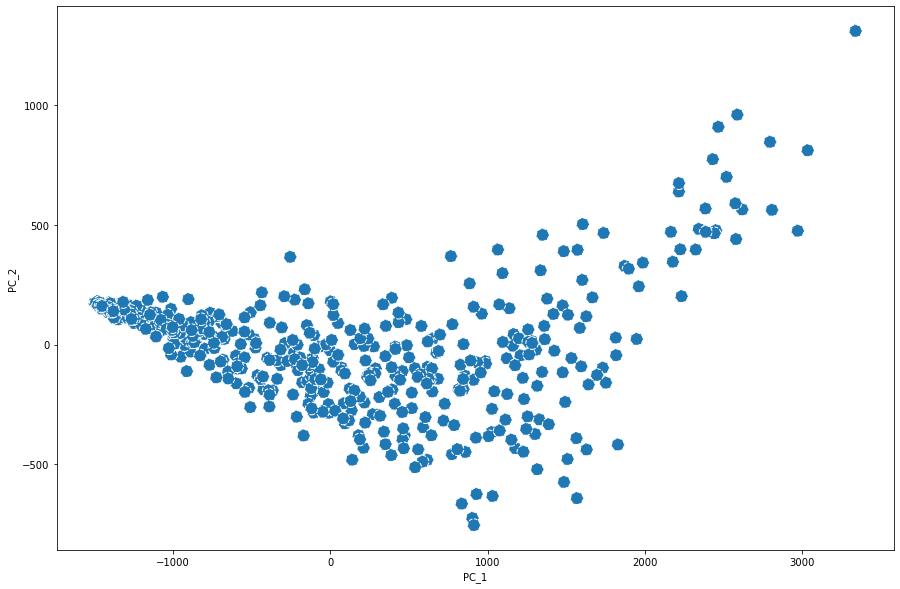

In [42]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC_1", y="PC_2",
    linestyle='--',
    data=data_pca,
    s=160,
    ax=ax
)

Based on the scatter plot in above, the best player is on **Upper Right** position. In next step, we will find who is the best player that visualized the scatter plot

### Find the best player through the highest value of PC_1 and PC_2

#### Concatenate dfOverallPlayer with data_pca

In [43]:
data_pca

,PC_1,PC_2
0,-315.549231,-86.471078
1,-847.777406,45.827046
2,1328.194612,-313.274548
3,216.012627,-242.754926
4,-799.679196,43.432336
...,...,...
481,517.064411,-201.232044
482,-882.270421,59.750720
483,-1379.364198,138.822194
484,-592.441254,-91.210038


In [44]:
dfOverallPlayer

,Player,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MeanOverallRating
0,Alex Abrines,SG,OKC,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,...,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0,67.574489
1,Quincy Acy,PF,TOT,38.0,1.0,558.0,11.8,0.565,0.529,0.353,...,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0,41.069689
2,Steven Adams,C,OKC,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,...,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0,174.865289
3,Arron Afflalo,SG,SAC,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,...,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0,92.048822
4,Alexis Ajinca,C,NOP,39.0,15.0,584.0,12.9,0.529,0.022,0.225,...,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0,45.784267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Cody Zeller,PF,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,124.546622
482,Tyler Zeller,C,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,39.695644
483,Stephen Zimmerman,C,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,9.374911
484,Paul Zipser,SF,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,51.868711


In [45]:
dfPlayer = pd.concat([data_pca, dfOverallPlayer], axis=1)
dfPlayer

,PC_1,PC_2,Player,Pos,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MeanOverallRating
0,-315.549231,-86.471078,Alex Abrines,SG,OKC,68.0,6.0,1055.0,10.1,0.560,...,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0,67.574489
1,-847.777406,45.827046,Quincy Acy,PF,TOT,38.0,1.0,558.0,11.8,0.565,...,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0,41.069689
2,1328.194612,-313.274548,Steven Adams,C,OKC,80.0,80.0,2389.0,16.5,0.589,...,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0,174.865289
3,216.012627,-242.754926,Arron Afflalo,SG,SAC,61.0,45.0,1580.0,9.0,0.559,...,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0,92.048822
4,-799.679196,43.432336,Alexis Ajinca,C,NOP,39.0,15.0,584.0,12.9,0.529,...,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0,45.784267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,517.064411,-201.232044,Cody Zeller,PF,CHO,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,124.546622
482,-882.270421,59.750720,Tyler Zeller,C,BOS,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,39.695644
483,-1379.364198,138.822194,Stephen Zimmerman,C,ORL,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,9.374911
484,-592.441254,-91.210038,Paul Zipser,SF,CHI,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,51.868711


In [46]:
data_pca.max()

PC_1    3337.937367
PC_2    1309.573472
dtype: float64

In [47]:
dfBestPlayer = dfPlayer[dfPlayer['PC_1'] > 3300]
dfBestPlayer

,PC_1,PC_2,Player,Pos,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MeanOverallRating
457,3337.937367,1309.573472,Russell Westbrook,PG,OKC,81.0,81.0,2802.0,30.6,0.554,...,137.0,727.0,864.0,840.0,133.0,31.0,438.0,190.0,2558.0,360.796867


# Objective 5

Which **team has the best average stat record of their players?** Note: you can refer to points, assists, rebounds, or anything else. A combination of several variables would be nice

In [48]:
dfOverallPlayer

,Player,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MeanOverallRating
0,Alex Abrines,SG,OKC,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,...,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0,67.574489
1,Quincy Acy,PF,TOT,38.0,1.0,558.0,11.8,0.565,0.529,0.353,...,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0,41.069689
2,Steven Adams,C,OKC,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,...,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0,174.865289
3,Arron Afflalo,SG,SAC,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,...,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0,92.048822
4,Alexis Ajinca,C,NOP,39.0,15.0,584.0,12.9,0.529,0.022,0.225,...,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0,45.784267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Cody Zeller,PF,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,124.546622
482,Tyler Zeller,C,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,39.695644
483,Stephen Zimmerman,C,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,9.374911
484,Paul Zipser,SF,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,51.868711


In [49]:
dfTeam = dfOverallPlayer.groupby(by=["Tm"]).sum()
dfTeam = pd.DataFrame(dfTeam.loc[:, 'MeanOverallRating'])
dfTeam

,MeanOverallRating
Tm,
ATL,1357.194378
BOS,1507.239800
BRK,1298.374089
CHI,1283.457600
CHO,1372.132400
CLE,1332.759800
DAL,1131.434800
DEN,1428.215844
DET,1492.004267


In [50]:
#Change column name
dfTeam.columns = ['SumOfMeanOverallRating']
dfTeam

,SumOfMeanOverallRating
Tm,
ATL,1357.194378
BOS,1507.239800
BRK,1298.374089
CHI,1283.457600
CHO,1372.132400
CLE,1332.759800
DAL,1131.434800
DEN,1428.215844
DET,1492.004267


## Find the Highest Value of SumOfMeanOverallRating

In [51]:
dfTeam.max()

SumOfMeanOverallRating    4062.5286
dtype: float64

## Find team with SumOfMeanOverallRating = 4062.5286

In [52]:
dfTeam[dfTeam['SumOfMeanOverallRating'] > 4000]

,SumOfMeanOverallRating
Tm,
TOT,4062.5286
